In [ ]:
# Here from Chandra website I was trying to understand how things are working

In [2]:
from astropy.coordinates import SkyCoord
from astropy import units as u

ngc1333 = SkyCoord.from_name('NGC 1333')
maxrad = 2.0 * u.arcmin

In [3]:
ngc1333

<SkyCoord (ICRS): (ra, dec) in deg
    (52.297, 31.31)>

In [5]:
import pyvo as vo

cone = vo.dal.SCSService('http://cda.cfa.harvard.edu/csc2scs/coneSearch')

In [6]:
help(cone.search)

Help on method search in module pyvo.dal.scs:

search(pos, radius=1.0, verbosity=2, **keywords) method of pyvo.dal.scs.SCSService instance
    submit a simple Cone Search query that requests objects or observations
    whose positions fall within some distance from a search position.
    
    Parameters
    ----------
    pos : astropy.coordinates.SkyCoord
        a SkyCoord instance defining the position of the center of the
        circular search region.
        converted if it's a iterable containing scalars,
        assuming icrs degrees.
    radius : `~astropy.units.Quantity` or float
        a Quantity instance defining the radius of the circular search
        region, in degrees.
        converted if it is another unit.
    verbosity : int
       an integer value that indicates the volume of columns
       to return in the result table.  0 means the minimum
       set of columns, 3 means as many columns as are available.
    **keywords :
       additional case insensitive param

In [7]:
results = cone.search(pos=ngc1333, radius=maxrad)

In [8]:
len(results)

11

In [9]:
results

<Table length=11>
         name                 ra         ... var_inter_index_b var_inter_index_w
                             deg         ...                                    
        object             float64       ...       int32             int32      
--------------------- ------------------ ... ----------------- -----------------
2CXO J032903.3+311839 52.264053208173095 ...                 8                --
2CXO J032906.5+311933  52.27748479124614 ...                 0                --
2CXO J032908.3+312020  52.28463480776571 ...                 5                --
2CXO J032909.2+312013  52.28852472101971 ...                 0                --
2CXO J032911.3+311717 52.297138025389756 ...                 8                --
2CXO J032912.7+312007  52.30321625483373 ...                 5                --
2CXO J032912.9+311814 52.303936134512355 ...                 8                --
2CXO J032913.5+311743  52.30662998943154 ...                 6                --
2CXO J0329

In [10]:
results.fieldnames

('name',
 'ra',
 'dec',
 'err_ellipse_r0',
 'conf_flag',
 'extent_flag',
 'sat_src_flag',
 'flux_aper_b',
 'flux_aper_lolim_b',
 'flux_aper_hilim_b',
 'flux_aper_w',
 'flux_aper_lolim_w',
 'flux_aper_hilim_w',
 'significance',
 'hard_hm',
 'hard_hm_lolim',
 'hard_hm_hilim',
 'hard_ms',
 'hard_ms_lolim',
 'hard_ms_hilim',
 'var_intra_index_b',
 'var_intra_index_w',
 'var_inter_index_b',
 'var_inter_index_w')

In [11]:
results['name']

masked_array(data=['2CXO J032903.3+311839', '2CXO J032906.5+311933',
                   '2CXO J032908.3+312020', '2CXO J032909.2+312013',
                   '2CXO J032911.3+311717', '2CXO J032912.7+312007',
                   '2CXO J032912.9+311814', '2CXO J032913.5+311743',
                   '2CXO J032915.6+311851', '2CXO J032918.5+311925',
                   '2CXO J032920.4+311834'],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False],
       fill_value='?',
            dtype=object)

In [12]:
for r in results:
    out = f"{r['name']} flux={r['flux_aper_b']:.3e}  "
    out += f"{r['flux_aper_lolim_b']:.3e} - {r['flux_aper_hilim_b']:.3e}"
    print(out)

2CXO J032903.3+311839 flux=0.000e+00  0.000e+00 - 2.780e-16
2CXO J032906.5+311933 flux=5.838e-15  4.613e-15 - 7.063e-15
2CXO J032908.3+312020 flux=nan  nan - nan
2CXO J032909.2+312013 flux=1.302e-15  6.820e-16 - 1.922e-15
2CXO J032911.3+311717 flux=5.124e-16  1.708e-16 - 8.398e-16
2CXO J032912.7+312007 flux=7.360e-16  4.279e-16 - 1.044e-15
2CXO J032912.9+311814 flux=8.559e-14  7.828e-14 - 9.244e-14
2CXO J032913.5+311743 flux=0.000e+00  0.000e+00 - 9.234e-16
2CXO J032915.6+311851 flux=1.300e-14  1.091e-14 - 1.496e-14
2CXO J032918.5+311925 flux=1.191e-14  9.853e-15 - 1.382e-14
2CXO J032920.4+311834 flux=2.206e-14  1.956e-14 - 2.441e-14


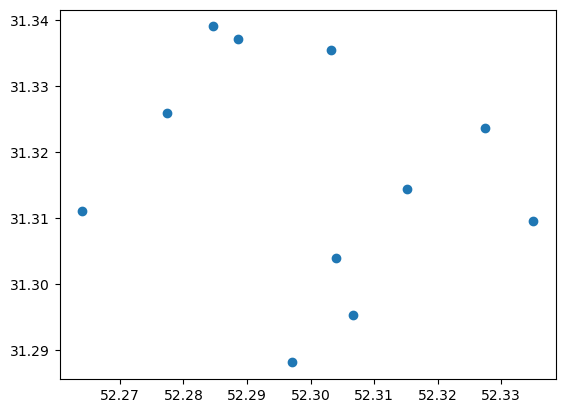

In [14]:
import matplotlib.pyplot as plt

plt.plot(results['ra'], results['dec'], 'o')

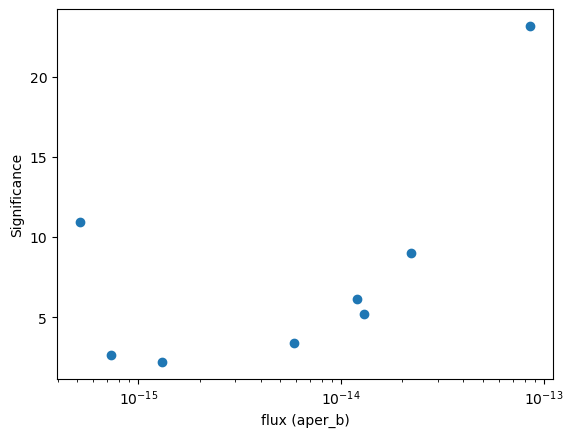

In [15]:
plt.plot(results['flux_aper_b'], results['significance'], 'o')
plt.xlabel('flux (aper_b)')
plt.ylabel('Significance')
plt.xscale('log')

In [16]:
results.votable.get_field_by_id_or_name('name')

<FIELD ID="name" arraysize="*" datatype="char" name="name"/>

In [17]:
tbl = results.to_table()

In [18]:
tbl['name']

2CXO J032903.3+311839
2CXO J032906.5+311933
2CXO J032908.3+312020
2CXO J032909.2+312013
2CXO J032911.3+311717
2CXO J032912.7+312007
2CXO J032912.9+311814
2CXO J032913.5+311743
2CXO J032915.6+311851
2CXO J032918.5+311925
2CXO J032920.4+311834


In [19]:
tbl['name'] = [str(n) for n in tbl['name']]

In [20]:
tbl['name']

2CXO J032903.3+311839
2CXO J032906.5+311933
2CXO J032908.3+312020
2CXO J032909.2+312013
2CXO J032911.3+311717
2CXO J032912.7+312007
2CXO J032912.9+311814
2CXO J032913.5+311743
2CXO J032915.6+311851
2CXO J032918.5+311925
2CXO J032920.4+311834


In [21]:
tbl

name,ra,dec,err_ellipse_r0,conf_flag,extent_flag,sat_src_flag,flux_aper_b,flux_aper_lolim_b,flux_aper_hilim_b,flux_aper_w,flux_aper_lolim_w,flux_aper_hilim_w,significance,hard_hm,hard_hm_lolim,hard_hm_hilim,hard_ms,hard_ms_lolim,hard_ms_hilim,var_intra_index_b,var_intra_index_w,var_inter_index_b,var_inter_index_w
,deg,deg,arcsec,,,,erg/s/cm^2,erg/s/cm^2,erg/s/cm^2,erg/s/cm^2,erg/s/cm^2,erg/s/cm^2,,,,,,,,,,,
str21,float64,float64,float64,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32
2CXO J032903.3+311839,52.264053208173095,31.31106095787967,0.8490675280114611,0,0,0,0.0,0.0,2.779850359713e-16,--,--,--,3.828571428571595,--,--,--,--,--,--,7,--,8,--
2CXO J032906.5+311933,52.27748479124614,31.32587557721507,0.7327854939415506,0,0,0,5.8379249864394e-15,4.612681470767e-15,7.0631685021119e-15,--,--,--,3.4117647058826313,0.77576514678326,0.64772017489069,0.88007495315428,0.27232979387883,-0.16926920674578,0.66396002498438,1,--,0,--
2CXO J032908.3+312020,52.28463480776571,31.338996385341815,0.8678631025303377,0,0,0,--,--,--,--,--,--,2.263157894736817,--,--,--,--,--,--,0,--,5,--
2CXO J032909.2+312013,52.28852472101971,31.337169858518294,1.0265599460318278,0,0,0,1.3020468421412e-15,6.8202453635966e-16,1.9220691479227e-15,--,--,--,2.2051282051282013,0.76702061211743,0.49531542785759,0.94628357276702,0.079950031230481,-0.40037476577139,0.81636477201749,1,--,0,--
2CXO J032911.3+311717,52.297138025389756,31.28818833144073,0.7246181435511504,0,0,0,5.1240943327491e-16,1.7080314442497e-16,8.397821267561e-16,--,--,--,10.940543446008615,-0.99937539038101,-1.0,-0.26046221111805,-0.77701436602124,-0.90880699562773,-0.59525296689569,10,--,8,--
2CXO J032912.7+312007,52.30321625483373,31.335460880981444,0.9368144254938002,0,0,0,7.3599899769871e-16,4.2790639401088e-16,1.0440916013865e-15,--,--,--,2.6666666666666483,-0.99937539038101,-1.0,-0.41411617738913,-0.50718301061836,-0.73891317926296,-0.210493441599,0,--,5,--
2CXO J032912.9+311814,52.303936134512355,31.303996974080796,0.7122644739792062,0,0,0,8.5586371260174e-14,7.8277736906954e-14,9.2438215966317e-14,--,--,--,23.176909584218283,0.86071205496565,0.82261086820737,0.89506558400999,0.54840724547158,0.28544659587758,0.75890068707058,7,--,8,--
2CXO J032913.5+311743,52.30662998943154,31.295338802464315,1.0688000599207017,0,0,0,0.0,0.0,9.2344863953846e-16,--,--,--,3.684210526316029,--,--,--,--,--,--,0,--,6,--


In [22]:
tbl.write('ngc1333.fits', format='fits', overwrite=True)

# General Query

In [23]:
tap = vo.dal.TAPService('http://cda.cfa.harvard.edu/csc2tap')

In [24]:
for i, tblname in enumerate(tap.tables.keys()):
    print(f"{i + 1:2d} - {tblname}")

 1 - TAP_SCHEMA.schemas
 2 - TAP_SCHEMA.tables
 3 - TAP_SCHEMA.columns
 4 - TAP_SCHEMA.keys
 5 - TAP_SCHEMA.key_columns
 6 - csc2.master_source
 7 - csc2.stack_source
 8 - csc2.observation_source
 9 - csc2.master_stack_assoc
10 - csc2.stack_observation_assoc
11 - csc2.detect_stack
12 - csc2.valid_stack
13 - csc2.likely_stack
14 - csc2.cross_match
15 - csc2.cone
16 - csc2.image
17 - ivoa.ObsCore


In [25]:
qry = """
SELECT m.name, m.ra, m.dec, m.conf_flag, m.significance, m.extent_flag, m.sat_src_flag,
       m.flux_aper_b, m.flux_aper_lolim_b, m.flux_aper_hilim_b
FROM csc2.master_source m
WHERE m.name LIKE '%X'
"""

In [26]:
tresults = tap.search(qry)

In [27]:
len(tresults)

1299

(370.0, -10.0)

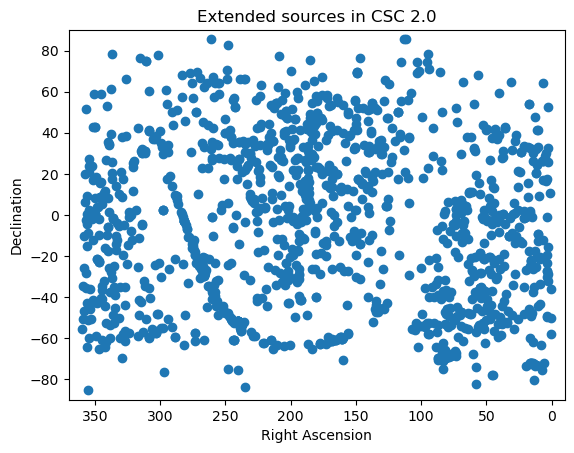

In [28]:
plt.plot(tresults['ra'], tresults['dec'], 'o')
plt.title('Extended sources in CSC 2.0')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.ylim(-90, 90)
plt.xlim(370, -10)

In [29]:
qry = """
SELECT m.name, m.ra, m.dec, m.conf_flag, m.significance, m.extent_flag, m.sat_src_flag,
       m.flux_aper_b, m.flux_aper_lolim_b, m.flux_aper_hilim_b
FROM csc2.master_source m
WHERE m.name NOT LIKE '%X'
"""

In [31]:
%time cat = tap.search(qry)

Wall time: 15min 38s


In [32]:
tap.maxrec

1000000

In [33]:
len(cat)

315868

In [49]:
type(cat)

pyvo.dal.tap.TAPResults

In [52]:
tbl = cat.to_table()

In [53]:
type(tbl)

astropy.table.table.Table

In [54]:
tbl['name'] = [str(n) for n in tbl['name']]

In [55]:
tbl.write('csc2.csv', format='csv', overwrite=True)

In [42]:
import csv

# Assuming you have already fetched the TAPResults object 'cat'

with open("results.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(cat)



In [39]:
from astroquery.utils.tap.core import TapPlus

tap = vo.dal.TAPService('http://cda.cfa.harvard.edu/csc2tap')

In [ ]:
plt.plot(cat['ra'], cat['dec'], '.', alpha=0.1)
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.ylim(-90, 90)
plt.xlim(370, -10);

In [ ]:
qry = """
SELECT m.name, m.ra, m.dec, m.conf_flag, m.significance, m.extent_flag, m.sat_src_flag,
       m.flux_aper_b, m.flux_aper_lolim_b, m.flux_aper_hilim_b
FROM csc2.master_source m
WHERE m.name NOT LIKE '%X'
"""

In [46]:
qry1 = """
SELECT a.name, a.ra, a.dec, a.conf_flag, a.significance, a.extent_flag,
       a.flux_aper_b, a.flux_aper_lolim_b, a.flux_aper_hilim_b, a.pileup_flag = 0,a.sat_src_flag = 0,a.conf_flag = 0,a.streak_src_flag = 0
FROM csc21_snapshot.master_stack_assoc a 
WHERE a.name NOT LIKE '%X'
"""

In [47]:
%time cat1 = tap.search(qry1)

DALQueryError: error parsing ADQL query

# NED Query

In [81]:
from astroquery.ned import Ned

def search_ned_objects(object_names):
    for name in object_names:
        result_table = Ned.query_object(name)
        if result_table is not None:
            # Print the results or perform further processing
            print(result_table)

# Example list of object names
object_names = ["M31", "M42", "NGC 224", "Messier 87"]

a= search_ned_objects(object_names)


No. Object Name     RA     ... Redshift Points Diameter Points Associations
                 degrees   ...                                             
--- ----------- ---------- ... --------------- --------------- ------------
  1 MESSIER 031   10.68479 ...              40              13            2
No. Object Name     RA     ... Redshift Points Diameter Points Associations
                 degrees   ...                                             
--- ----------- ---------- ... --------------- --------------- ------------
  1 MESSIER 042   83.81866 ...               0               6            0
No. Object Name     RA     ... Redshift Points Diameter Points Associations
                 degrees   ...                                             
--- ----------- ---------- ... --------------- --------------- ------------
  1 MESSIER 031   10.68479 ...              40              13            2
No. Object Name     RA     ... Redshift Points Diameter Points Associations
            

In [66]:
from astroquery.ned import Ned
import numpy as np

def search_ned_objects(object_names):
    results = []
    for name in object_names:
        result_table = Ned.query_object(name)
        if result_table is not None:
            # Append the result table to the array
            print(type(result_table))
            results.append(result_table)
    return np.array(results)

# Example list of object names
object_names = np.array(["M31", "M42", "NGC 224", "Messier 87"])

# Search NED and store results in an array
search_results = search_ned_objects(object_names)

# Access the results from the array
# for result_table in search_results:
#     print(result_table)
print(type(search_results))


<class 'astropy.table.table.Table'>
<class 'astropy.table.table.Table'>
<class 'astropy.table.table.Table'>
<class 'astropy.table.table.Table'>
<class 'numpy.ndarray'>


In [64]:
search_results

array([[(1, 'MESSIER 031',  10.68479, 41.26906, 'G', -297., -0.000991, 'SUN', '4.36', nan, 5083, 23, 176,  62, 40, 13, 2)],
       [(1, 'MESSIER 042',  83.81866, -5.38968, 'HII',   nan,       nan, '', '3.0', nan,   61,  1,  20,   8,  0,  6, 0)],
       [(1, 'MESSIER 031',  10.68479, 41.26906, 'G', -297., -0.000991, 'SUN', '4.36', nan, 5083, 23, 176,  62, 40, 13, 2)],
       [(1, 'MESSIER 087', 187.70593, 12.39112, 'G', 1284.,  0.004283, 'UUN', '9.59', nan, 3288, 55, 506, 114, 73, 14, 1)]],
      dtype=[('No.', '<i4'), ('Object Name', '<U30'), ('RA', '<f8'), ('DEC', '<f8'), ('Type', 'O'), ('Velocity', '<f8'), ('Redshift', '<f8'), ('Redshift Flag', 'O'), ('Magnitude and Filter', 'O'), ('Separation', '<f8'), ('References', '<i4'), ('Notes', '<i4'), ('Photometry Points', '<i4'), ('Positions', '<i4'), ('Redshift Points', '<i4'), ('Diameter Points', '<i4'), ('Associations', '<i4')])

In [ ]:
from astroquery.ned import Ned
import numpy as np

def search_ned_objects(object_names):
    results = []
    for name in object_names:
        result_table = Ned.query_object(name)
        if result_table is not None:
            # Convert the table to a pandas DataFrame
            df = tbl.to_pandas()

            # Append the DataFrame to the existing CSV file
            df.to_csv('csc2.csv', mode='a', header=False, index=False)
    return 0

# Example list of object names
object_names = np.array(["M31", "M42", "NGC 224", "Messier 87"])

# Search NED and store results in an array
search_results = search_ned_objects(object_names)

# Access the results from the array
# for result_table in search_results:
#     print(result_table)
print(type(search_results))



# Chandra NED Cross Match

In [68]:
import pandas as pd

csc2 = pd.read_csv("C://Users//SATYAPRIYA//X ray ML Project Samir Sir//csc2.csv")

In [69]:
Name_list_chandra = csc2.iloc[:,0]

In [70]:
from astroquery.ned import Ned
from astropy.table import Table
import pandas as pd

def search_ned_objects(object_names):
    results = []
    for index, name in enumerate(object_names):
        try:
            result_table = Ned.query_object(name)
            if result_table is not None:
                # Convert the table to a pandas DataFrame
                df = result_table.to_pandas()

                # Append the DataFrame to the existing CSV file
                df.to_csv('NED_csc2 cross match.csv', mode='a', header=False, index=False)
        except Exception as e:
            if isinstance(e, TimeoutError):
                return  print(index)
            else:
                raise
    return "Done"


In [75]:
search_ned_objects(Name_list_chandra[297:])

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [78]:
for i in range(len(Name_list_chandra)):
    if Name_list_chandra[i]=="2MASS J17401627-3044049":
        print(i)
        break        

Edited one

In [83]:
from astroquery.ned import Ned
from astropy.table import Table
import pandas as pd

def search_ned_objects(object_names):
    results = []
    for index, name in enumerate(object_names):
        try:
            result_table = Ned.query_object(name)
            if result_table is not None:
                
                # Convert the table to a pandas DataFrame
                df = result_table.to_pandas()
                
                # Add the object name as a new column in the DataFrame
                df['Object Name'] = name
                
                # Append the DataFrame to the existing CSV file
                df.to_csv('NED_csc2 cross match.csv', mode='a', header=False, index=False)
        except Exception as e:
            if isinstance(e, TimeoutError):
                return  index
            else:
                raise
    return "Done"


Do testing and check if it is working or not

In [ ]:
print(search_ned_objects(Name_list_chandra[1:6]))
#Print will return the value.The index or if it is done.
#Do it under some other name for storage so that does not mess things up.

In [ ]:
import pandas as pd

epoch1_2SXPS = pd.read_csv("D://Astronomy/VLA Sky Survey//epochs with name and ra dec only//epoch 1 and 2SXPS comp name ra dec.csv")

# GAIA

In [ ]:
from astropy.coordinates import SkyCoord
import astropy.units as u
from astroquery.gaia import Gaia
import pandas as pd

def search_gaia(ra_list, dec_list):
    for index in range(len(ra_list)):
        try:
            coord = SkyCoord(ra_list[index], dec_list[index], unit=(u.deg, u.deg), frame='icrs')
            gaia_result = Gaia.query_object_async(coordinate=coord, width=0.005 * u.deg, height=0.005 * u.deg)
            gaia_table = gaia_result['ra', 'dec','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag']

            # Save the Gaia table to a CSV file
            if index == 0:
                # Overwrite the file for the first object
                gaia_table.write('D://Astronomy//Gaia_csc2_cross_match.csv', format='csv', overwrite=True)
            else:
                # Append the table to the file for subsequent objects
                gaia_table.write('D://Astronomy//Gaia_csc2_cross_match.csv', format='csv', append=True)
        except Exception as e:
            return [index, e]
    return "Done"


In [1]:
import pandas as pd

data = pd.read_csv("D://Astronomy//1 year x ray project//csc2.csv")

In [ ]:
from astropy.coordinates import SkyCoord
import astropy.units as u
from astroquery.gaia import Gaia
import pandas as pd

def search_gaia(object_names):
    for index, object_name in enumerate(object_names):
        try:
            gaia_result = Gaia.query_object_async(object_name=object_name)
            gaia_table = gaia_result['ra', 'dec', 'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag']

            # Save the Gaia table to a CSV file
            if index == 0:
                # Overwrite the file for the first object
                gaia_table.write('D://Astronomy//Gaia_csc2_cross_match.csv', format='csv', overwrite=True)
            else:
                # Append the table to the file for subsequent objects
                gaia_table.write('D://Astronomy//Gaia_csc2_cross_match.csv', format='csv', append=True)
        except Exception as e:
            return [index, e]
    return "Done"
